<a href="https://colab.research.google.com/github/EgorGod21/Comparison_detection_models/blob/main/Models/ssd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as T
import torchvision
import numpy as np
import cv2
import os
import time
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%bash
pip install numpy scipy scikit-image matplotlib

In [ ]:
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 40.3MB/s]
Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [ ]:
ssd_model.to('cuda')
ssd_model.eval();

In [ ]:
photos = [f'./TestPhoto/{i}.jpg' for i in range(1,33)]
photos

['./TestPhoto/1.jpg',
 './TestPhoto/2.jpg',
 './TestPhoto/3.jpg',
 './TestPhoto/4.jpg',
 './TestPhoto/5.jpg',
 './TestPhoto/6.jpg',
 './TestPhoto/7.jpg',
 './TestPhoto/8.jpg',
 './TestPhoto/9.jpg',
 './TestPhoto/10.jpg',
 './TestPhoto/11.jpg',
 './TestPhoto/12.jpg',
 './TestPhoto/13.jpg',
 './TestPhoto/14.jpg',
 './TestPhoto/15.jpg',
 './TestPhoto/16.jpg',
 './TestPhoto/17.jpg',
 './TestPhoto/18.jpg',
 './TestPhoto/19.jpg',
 './TestPhoto/20.jpg',
 './TestPhoto/21.jpg',
 './TestPhoto/22.jpg',
 './TestPhoto/23.jpg',
 './TestPhoto/24.jpg',
 './TestPhoto/25.jpg',
 './TestPhoto/26.jpg',
 './TestPhoto/27.jpg',
 './TestPhoto/28.jpg',
 './TestPhoto/29.jpg',
 './TestPhoto/30.jpg',
 './TestPhoto/31.jpg',
 './TestPhoto/32.jpg']

In [ ]:
inputs = [utils.prepare_input(photo) for photo in photos]
tensor = utils.prepare_tensor(inputs)

with torch.no_grad():
    start_time = time.time()
    detections_batch = ssd_model(tensor)
    end_time = time.time()

gpu_time = (end_time-start_time)/len(photos)
gpu_time

0.030277512967586517

In [ ]:
results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.60) for results in results_per_input]

In [ ]:
classes_to_labels = np.array(utils.get_coco_object_dictionary())

{'Model': 'SDD', 'Image': '1.jpg', 'Predicted Classes': {'car': 2}, 'Number of Objects': 2}


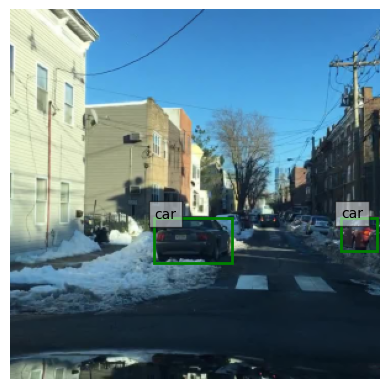

{'Model': 'SDD', 'Image': '2.jpg', 'Predicted Classes': {'car': 1}, 'Number of Objects': 1}


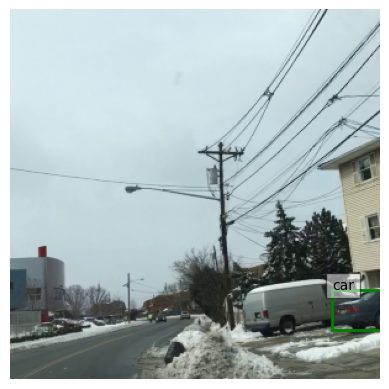

{'Model': 'SDD', 'Image': '3.jpg', 'Predicted Classes': {'car': 1}, 'Number of Objects': 1}


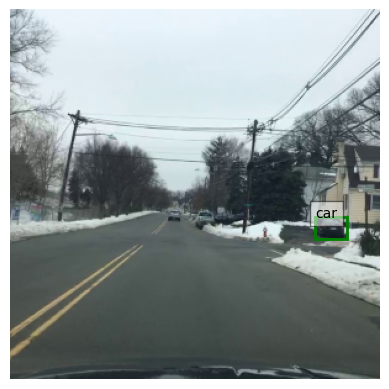

{'Model': 'SDD', 'Image': '4.jpg', 'Predicted Classes': {'car': 1}, 'Number of Objects': 1}


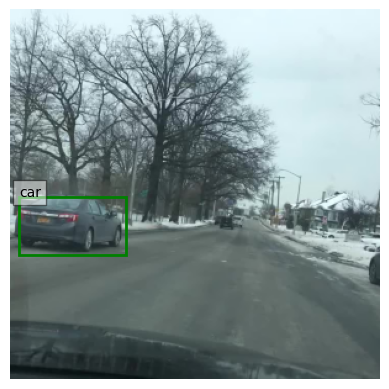

{'Model': 'SDD', 'Image': '5.jpg', 'Predicted Classes': {'car': 1, 'truck': 1}, 'Number of Objects': 2}


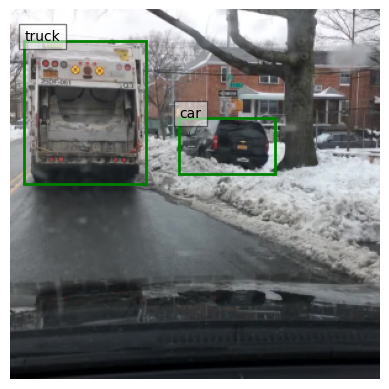

{'Model': 'SDD', 'Image': '6.jpg', 'Predicted Classes': {'car': 2}, 'Number of Objects': 2}


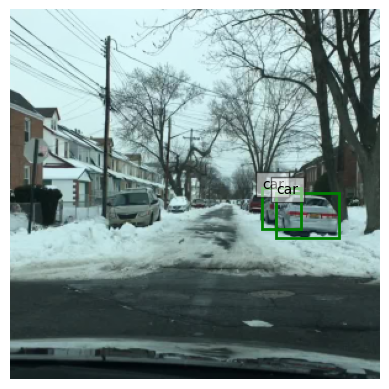

{'Model': 'SDD', 'Image': '7.jpg', 'Predicted Classes': {}, 'Number of Objects': 0}


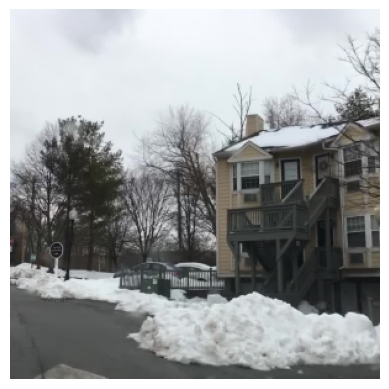

{'Model': 'SDD', 'Image': '8.jpg', 'Predicted Classes': {'car': 1, 'stop sign': 1}, 'Number of Objects': 2}


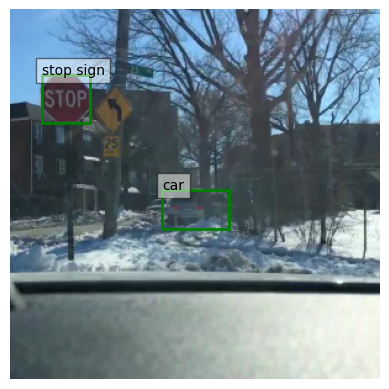

{'Model': 'SDD', 'Image': '9.jpg', 'Predicted Classes': {'car': 1}, 'Number of Objects': 1}


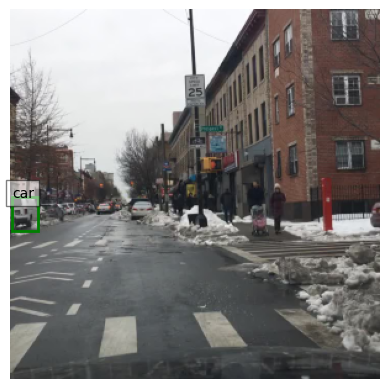

{'Model': 'SDD', 'Image': '10.jpg', 'Predicted Classes': {'traffic light': 1}, 'Number of Objects': 1}


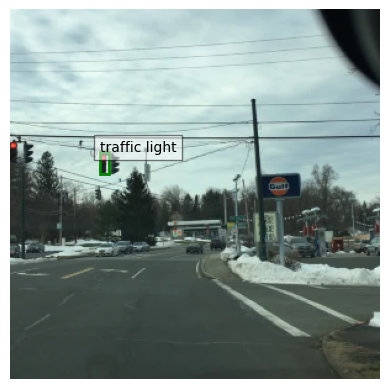

{'Model': 'SDD', 'Image': '11.jpg', 'Predicted Classes': {'car': 4}, 'Number of Objects': 4}


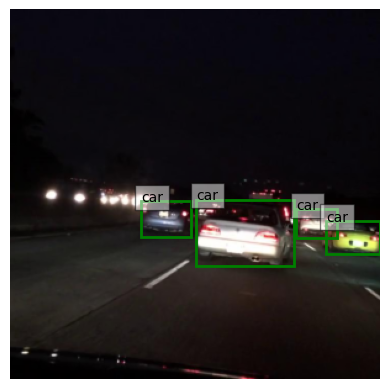

{'Model': 'SDD', 'Image': '12.jpg', 'Predicted Classes': {'car': 4}, 'Number of Objects': 4}


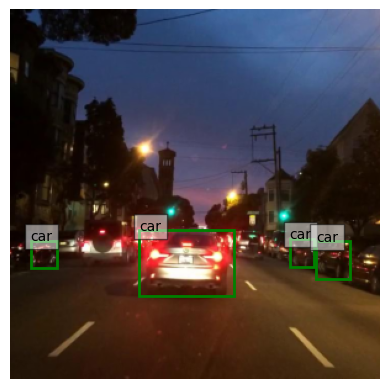

{'Model': 'SDD', 'Image': '13.jpg', 'Predicted Classes': {'car': 2}, 'Number of Objects': 2}


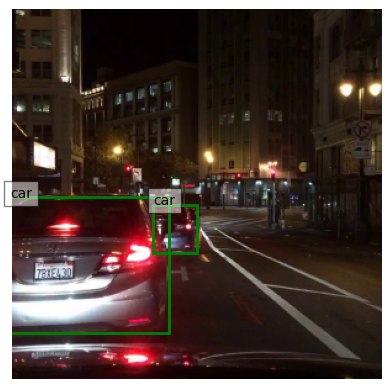

{'Model': 'SDD', 'Image': '14.jpg', 'Predicted Classes': {'car': 3}, 'Number of Objects': 3}


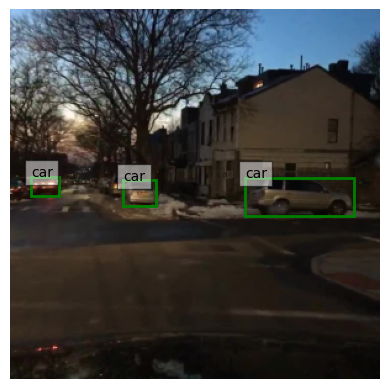

{'Model': 'SDD', 'Image': '15.jpg', 'Predicted Classes': {'car': 5}, 'Number of Objects': 5}


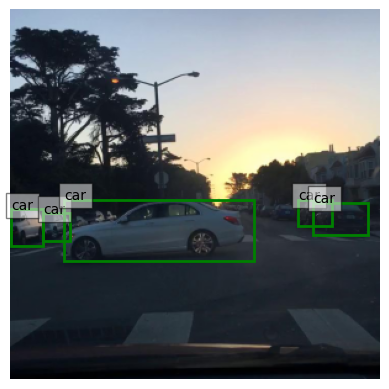

{'Model': 'SDD', 'Image': '16.jpg', 'Predicted Classes': {'car': 1}, 'Number of Objects': 1}


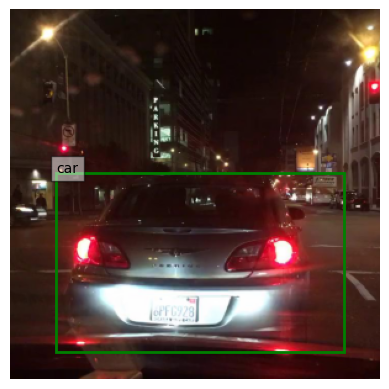

{'Model': 'SDD', 'Image': '17.jpg', 'Predicted Classes': {}, 'Number of Objects': 0}


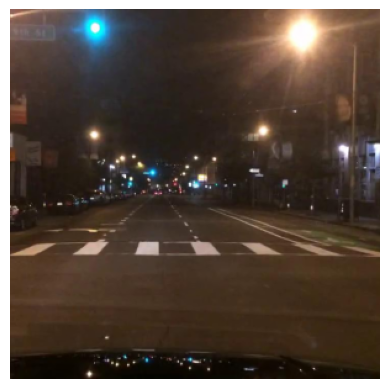

{'Model': 'SDD', 'Image': '18.jpg', 'Predicted Classes': {'car': 1}, 'Number of Objects': 1}


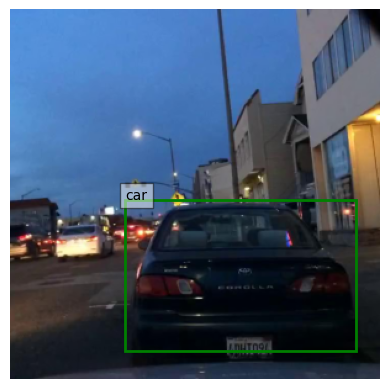

{'Model': 'SDD', 'Image': '19.jpg', 'Predicted Classes': {'traffic light': 1, 'car': 2}, 'Number of Objects': 3}


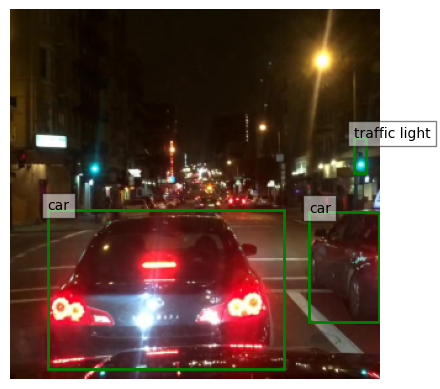

{'Model': 'SDD', 'Image': '20.jpg', 'Predicted Classes': {'car': 2}, 'Number of Objects': 2}


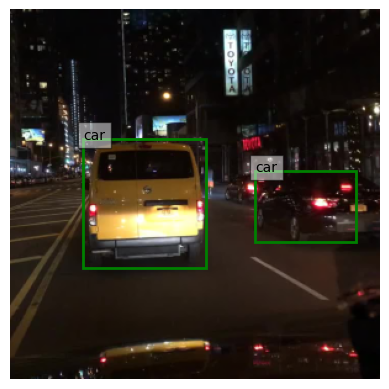

{'Model': 'SDD', 'Image': '21.jpg', 'Predicted Classes': {'car': 4}, 'Number of Objects': 4}


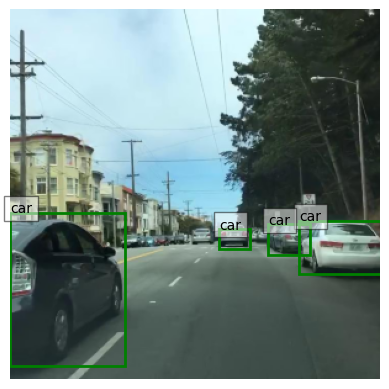

{'Model': 'SDD', 'Image': '22.jpg', 'Predicted Classes': {'car': 2}, 'Number of Objects': 2}


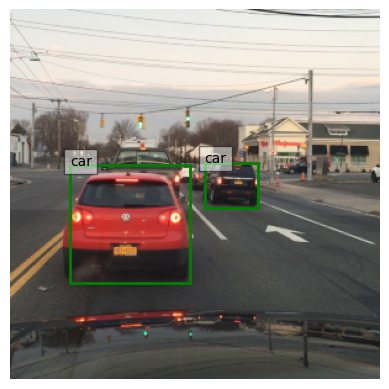

{'Model': 'SDD', 'Image': '23.jpg', 'Predicted Classes': {'bus': 1, 'car': 5}, 'Number of Objects': 6}


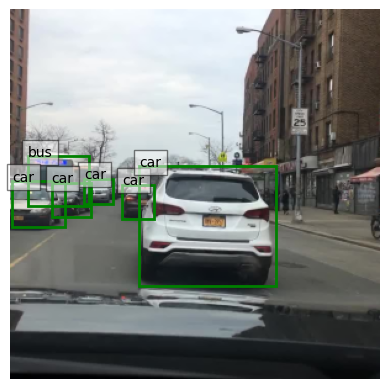

{'Model': 'SDD', 'Image': '24.jpg', 'Predicted Classes': {'car': 1}, 'Number of Objects': 1}


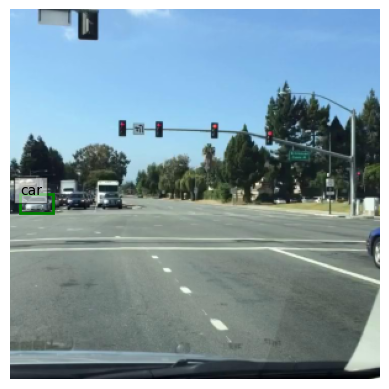

{'Model': 'SDD', 'Image': '25.jpg', 'Predicted Classes': {'person': 1}, 'Number of Objects': 1}


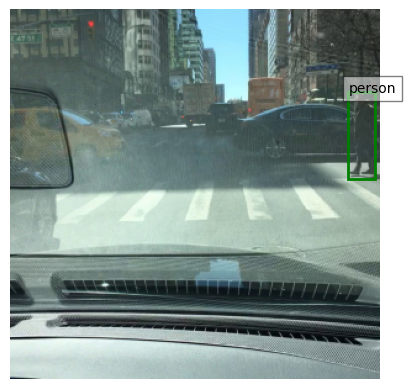

{'Model': 'SDD', 'Image': '26.jpg', 'Predicted Classes': {'car': 1, 'traffic light': 2}, 'Number of Objects': 3}


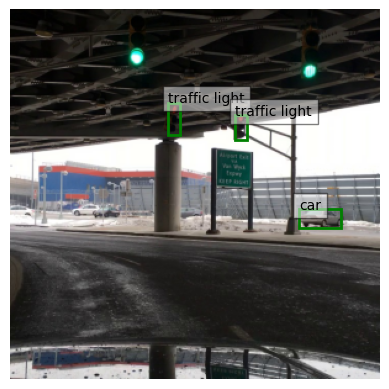

{'Model': 'SDD', 'Image': '27.jpg', 'Predicted Classes': {'car': 6}, 'Number of Objects': 6}


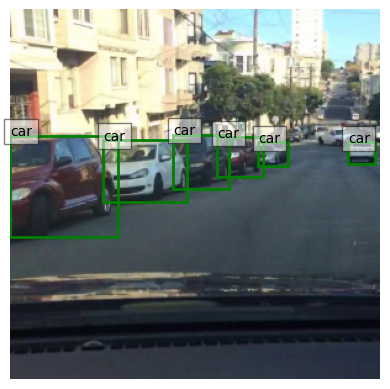

{'Model': 'SDD', 'Image': '28.jpg', 'Predicted Classes': {'traffic light': 1, 'car': 4}, 'Number of Objects': 5}


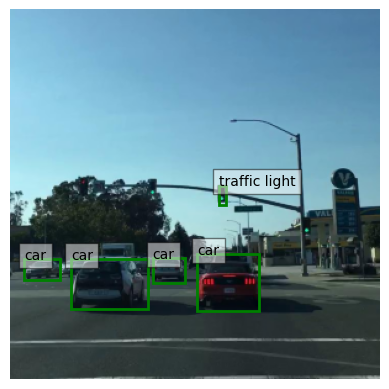

{'Model': 'SDD', 'Image': '29.jpg', 'Predicted Classes': {'car': 5}, 'Number of Objects': 5}


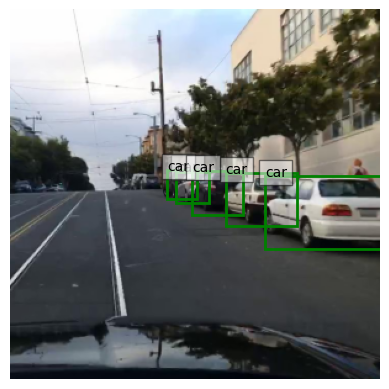

{'Model': 'SDD', 'Image': '30.jpg', 'Predicted Classes': {'truck': 1, 'car': 2, 'person': 1}, 'Number of Objects': 4}


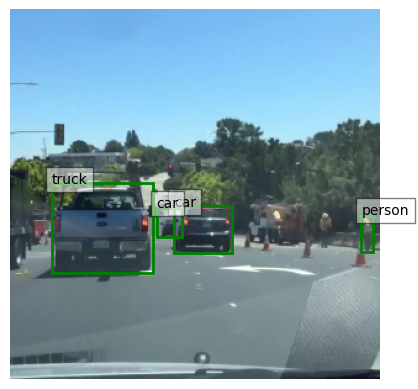

{'Model': 'SDD', 'Image': '31.jpg', 'Predicted Classes': {'car': 1}, 'Number of Objects': 1}


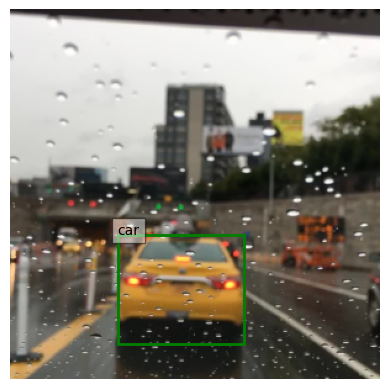

{'Model': 'SDD', 'Image': '32.jpg', 'Predicted Classes': {'truck': 2, 'car': 1}, 'Number of Objects': 3}


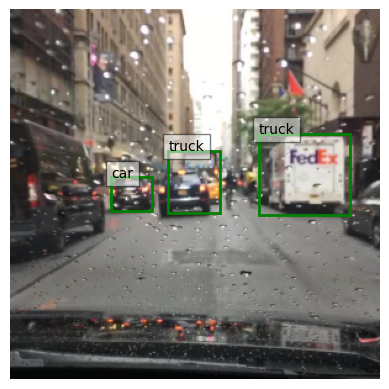

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from collections import Counter
import os

output_path = './TestPhotoPredictSSD'

os.makedirs(output_path, exist_ok=True)

results = []

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)

    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)

    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{}".format(classes_to_labels[classes[idx] - 1]), bbox=dict(facecolor='white', alpha=0.5))

    pred_cls = [classes_to_labels[c - 1] for c in classes]
    result = {
            'Model': 'SDD',
            'Image': f'{image_idx+1}.jpg',
            'Predicted Classes': dict(Counter(pred_cls)),
            'Number of Objects': len(pred_cls)
        }
    results.append(result)
    print(result)
    ax.axis('off')

    output = os.path.join(output_path, f'{image_idx + 1}.jpg')
    plt.savefig(output, bbox_inches='tight', pad_inches=0.0, transparent=True)
    plt.show()
    plt.close()


In [ ]:
df = pd.DataFrame(results)

df.to_csv(f'{output_path}/models_info.csv', index=False)

In [ ]:
uris = [
    'http://images.cocodataset.org/val2017/000000397133.jpg'
]

In [ ]:
inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs)

In [ ]:
num_iterations = 100  # Choose the number of iterations to get an average time

with torch.no_grad():
    detections_batch = ssd_model(tensor)

start_time = time.time()
for _ in range(num_iterations):
    with torch.no_grad():
        detections_batch = ssd_model(tensor)
end_time = time.time()

gpu_time = (end_time - start_time) / num_iterations

In [ ]:
data = pd.read_csv('models_info.csv')
cpu_time = data[data['Model'] == 'SSD_300'].groupby(['Model']).agg({'Prediction Time':'mean'}).values[0][0]

In [ ]:
data = {'Model': ['SDD'], 'Inference_Time_GPU': [gpu_time], 'Inference_Time_CPU': [cpu_time]}

In [ ]:
df_time = pd.DataFrame(data)
df_time.to_csv(f'{output_path}/models_time.csv', index=False)

In [ ]:
df_time

Model  Inference_Time_GPU  Inference_Time_CPU
0   SDD            0.014035            0.063911